### The dataset for this program can be obtained from
https://www.kaggle.com/moltean/fruits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import confusion_matrix,classification_report
from keras.models import Sequential,load_model
from keras.optimizers import Adam,rmsprop
from keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

Using TensorFlow backend.


In [2]:
train_data_dir = '/users/dipit/Documents/MLDL/CNN/fruits-360/train'
validation_data_dir = '/users/dipit/Documents/MLDL/CNN/fruits-360/validation'
test_dir = '/users/dipit/Documents/MLDL/CNN/fruits-360/test-multiple_fruits'

In [3]:
num_classes = 81
img_rows,img_cols = 64,64
batch_size = 32

In [4]:
train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   rotation_range = 0.3,
                                   vertical_flip = True,
                                   horizontal_flip = True,
                                   shear_range = 0.3,
                                   fill_mode = 'nearest')
val_data_gen = ImageDataGenerator(rescale = 1./255)
test_data_gen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_data = train_data_gen.flow_from_directory(directory = train_data_dir,
                                                target_size = (img_rows,img_cols),
                                                shuffle = True,
                                                batch_size = batch_size,
                                                class_mode = 'categorical'
                                               )

Found 41322 images belonging to 81 classes.


In [7]:
val_data = val_data_gen.flow_from_directory(directory = validation_data_dir,
                                            target_size = (img_rows,img_cols),
                                            shuffle = False,
                                            batch_size = batch_size,
                                            class_mode = 'categorical'
                                            )

Found 13877 images belonging to 81 classes.


In [9]:
test_data = test_data_gen.flow_from_directory(directory = test_dir,
                                              target_size = (img_rows,img_cols),
                                              shuffle = False,
                                              batch_size = batch_size,
                                              class_mode = 'categorical'
                                             )

Found 0 images belonging to 0 classes.


### Defining our model

In [16]:
def convnet():
    model = Sequential([
            Conv2D(32,(3,3),padding = 'same',activation = 'relu',input_shape = (img_rows,img_cols,3)),
            Conv2D(32,(3,3),padding = 'same',activation = 'relu'),
            MaxPooling2D(pool_size = (2,2),strides = 2),
            Dropout(0.25),
        
            Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
            Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
            MaxPooling2D(pool_size = (2,2),strides = 2),
            Dropout(0.25),
        
            Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
            Conv2D(64,(3,3),padding = 'same',activation = 'relu'),
            MaxPooling2D(pool_size = (2,2),strides = 2),
            Dropout(0.25),
        
            Flatten(),
            Dense(128,activation = 'relu'),
            Dropout(0.5),
            Dense(num_classes,activation = 'softmax'),
            ])
            
    return model

In [17]:
model = convnet()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

In [18]:
checkpoint = ModelCheckpoint("fruit-classifier-cnn-model.h5",
                            monitor = 'val_loss',
                            mode = 'min',
                            save_best_only = True,
                            verbose = 1)
early_stopping = EarlyStopping(monitor = 'val_loss',
                              min_delta = 0,
                              patience = 3,
                              verbose = 1,
                              restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                             factor = 0.2,
                             patience = 3,
                             verbose = 1,
                             min_delta = 0.00001)
callbacks = [checkpoint,early_stopping,reduce_lr]

In [19]:
model.compile(optimizer = Adam(lr = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy']
             )

In [22]:
nb_train_samples = 41322
nb_val_samples = 13877
epoch = 10

In [23]:
history = model.fit(train_data,
                    steps_per_epoch = nb_train_samples // batch_size,
                    epochs = epoch,
                    validation_data = val_data,
                    validation_steps = nb_val_samples // batch_size,
                    callbacks = callbacks
                   )

Epoch 1/10
1291/1291 [==============================] - 1341s 1s/step - loss: 3.7373 - accuracy: 0.0600 - val_loss: 1.4390 - val_accuracy: 0.2146

Epoch 00001: val_loss improved from inf to 1.43900, saving model to fruit-classifier-cnn-model.h5
Epoch 2/10
1291/1291 [==============================] - 1500s 1s/step - loss: 2.4631 - accuracy: 0.2398 - val_loss: 0.7385 - val_accuracy: 0.5285

Epoch 00002: val_loss improved from 1.43900 to 0.73851, saving model to fruit-classifier-cnn-model.h5
Epoch 3/10
1291/1291 [==============================] - 764s 591ms/step - loss: 1.6099 - accuracy: 0.4533 - val_loss: 0.6094 - val_accuracy: 0.7456

Epoch 00003: val_loss improved from 0.73851 to 0.60945, saving model to fruit-classifier-cnn-model.h5
Epoch 4/10
1291/1291 [==============================] - 597s 462ms/step - loss: 1.2044 - accuracy: 0.5740 - val_loss: 0.0622 - val_accuracy: 0.7922

Epoch 00004: val_loss improved from 0.60945 to 0.06216, saving model to fruit-classifier-cnn-model.h5
Epoc

In [25]:
scores = model.evaluate_generator(val_data,steps = nb_val_samples // batch_size+1,verbose = 1)
print("\n Test result: %.3f loss : %.3f"%(scores[1]*100,scores[0]))

434/434 [==============================] - 43s 100ms/step

 Test result: 87.713 loss : 0.005


In [26]:
model.save("fruit-classifer-cnn-model.h5")

In [31]:
y_pred = model.predict_generator(val_data,nb_val_samples//batch_size+1)

In [32]:
y_pred_label = np.argmax(y_pred,axis =1)

In [34]:
print("Confusion_matrix")
print(confusion_matrix(val_data.classes,y_pred_label))
print("Classification Report")
class_labels = val_data.class_indices
class_labels = {v: k for k,v in class_labels.items()}
classes = list(class_labels.values())
print(classification_report(val_data.classes,y_pred_label,target_names = classes))

Confusion_matrix
[[126   0   0 ...   0   0   0]
 [  0 160   3 ...   0   0   0]
 [  0   0 164 ...   0   0   0]
 ...
 [  0   0   0 ... 164   0   0]
 [  0   0   0 ...   0 127   0]
 [  0   0   0 ...   0   0 249]]
Classification Report
                     precision    recall  f1-score   support

     Apple Braeburn       0.47      0.77      0.59       164
     Apple Golden 1       0.98      0.98      0.98       164
     Apple Golden 2       0.91      1.00      0.95       164
     Apple Golden 3       1.00      0.80      0.89       161
 Apple Granny Smith       1.00      1.00      1.00       164
        Apple Red 1       0.73      0.95      0.83       164
        Apple Red 2       0.97      1.00      0.98       164
        Apple Red 3       0.83      0.90      0.86       144
Apple Red Delicious       1.00      1.00      1.00       166
   Apple Red Yellow       1.00      0.66      0.79       164
            Apricot       1.00      1.00      1.00       164
            Avocado       1.00      

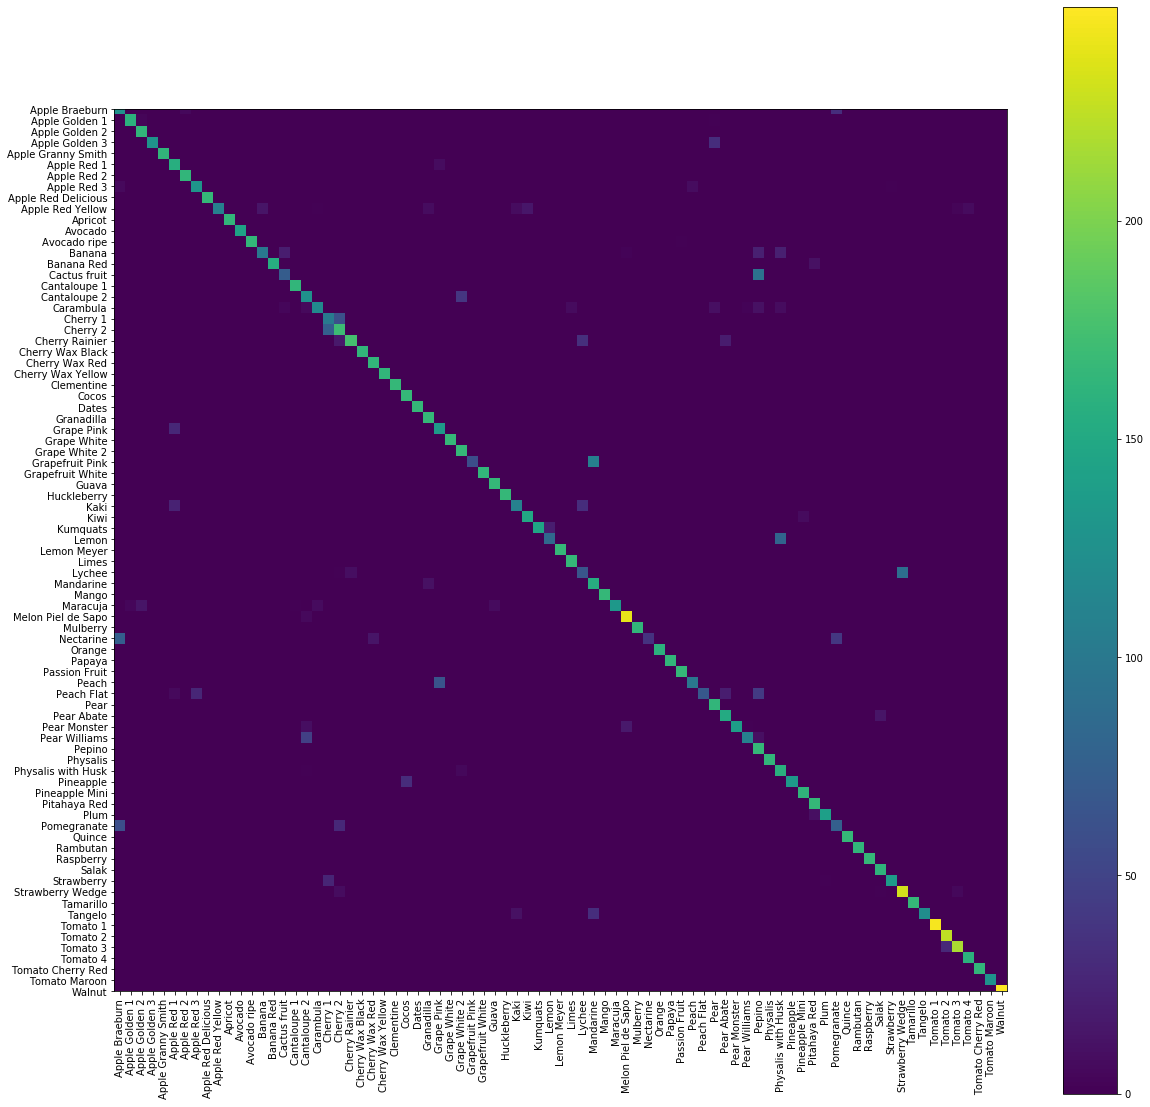

In [37]:
plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(val_data.classes,y_pred_label)

plt.imshow(cnf_matrix,interpolation = 'nearest')
plt.colorbar()

tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks,classes,rotation = 90)
_ = plt.yticks(tick_marks,classes)

In [44]:
from keras.preprocessing import image
import os
import cv2
from os import listdir
from os.path import isfile , join
import re

def draw_test(name,pred,im,true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im,160,0,0,500,cv2.BORDER_CONSTANT,value =BLACK)
    cv2.putText(expanded_image,"predicted - "+pred,(20,60),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,225),2)
    cv2.putText(expanded_image,"true - "+true_label,(20,120),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow(name,expanded_image)
    
def getRandomImage(path,img_width,img_height):
    folders = list(filter(lambda x:os.path.isdir(os.path.join(path,x)),os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + '/' + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path,f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path,target_size = (img_width,img_height)),final_path,path_class

img_width,img_height = 64,64

files =[]
predictions =[]
true_labels = []

for i in range(0,10):
    #path = '/users/dipit/Documents/MLDL/CNN/fruits-360/test-multiple_fruits'
    path = '/users/dipit/Documents/MLDL/CNN/fruits-360/validation'
    img,final_path,true_label = getRandomImage(path,img_width,img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x,axis = 0)
    images = np.vstack([x])
    classes = model.predict_classes(images,batch_size = 10)
    predictions.append(classes)
    
for i in range(0,len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction",class_labels[predictions[i][0]],image,true_labels[i])
    cv2.waitKey(0)
    
cv2.destroyAllWindows()